In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting up a working directory
os.chdir("C:\project3")

In [3]:
os.getcwd()

'C:\\project3'

In [4]:
#importing data set
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#storing required variables from the datset
x = df.iloc[: ,[3,4]].values

In [11]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
from sklearn.cluster import KMeans
wcss=[]

In [13]:
#iterations of Kmean algorithms for clusters ranging 1 to 11 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

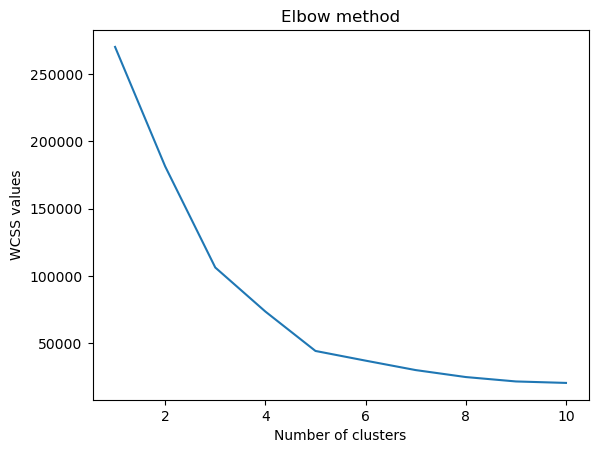

In [14]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")
plt.show()


In [15]:
kmeansmodel=KMeans(n_clusters=6,init="k-means++",random_state=0)

In [16]:
ykmeans=kmeansmodel.fit_predict(x)

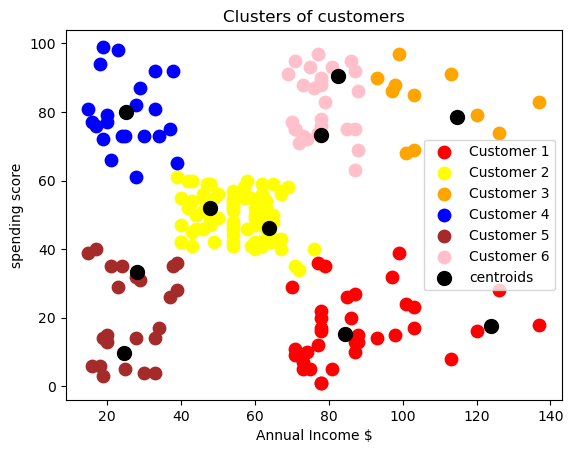

In [17]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=80,c="red",label="Customer 1")
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=80,c="yellow",label="Customer 2")
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=80,c="orange",label="Customer 3")
plt.scatter(x[ykmeans==3,0],x[ykmeans==3,1],s=80,c="blue",label="Customer 4")
plt.scatter(x[ykmeans==4,0],x[ykmeans==4,1],s=80,c="brown",label="Customer 5")
plt.scatter(x[ykmeans==5,0],x[ykmeans==5,1],s=80,c="pink",label="Customer 6")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income $")
plt.ylabel("spending score")
plt.legend()
plt.show()


Intuitions that can be extracted from the above chart:
1) Blue cluster represents the customers who has less salary but the spending is more whereas red cluster represents the customers who has high salary but comparatively less spendings.
2) The yellow cluster represent customers who have decent salary and moderate spending record.
3) Therefore the yellow cluster are the target customers since they are more in number compared to other clusters.
